<a href="https://colab.research.google.com/github/goitstudent123/numerical_programming_python/blob/main/%D0%94%D0%971_%D0%93%D0%90%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
# Load data and create a DataFrame
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")
target_names = iris.target_names
df = X.copy()
df["species"] = y.map({i: name for i, name in enumerate(target_names)})

In [3]:
# Basic statistics
print("\n== Basic statistics ==")
print(X.describe())


== Basic statistics ==
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


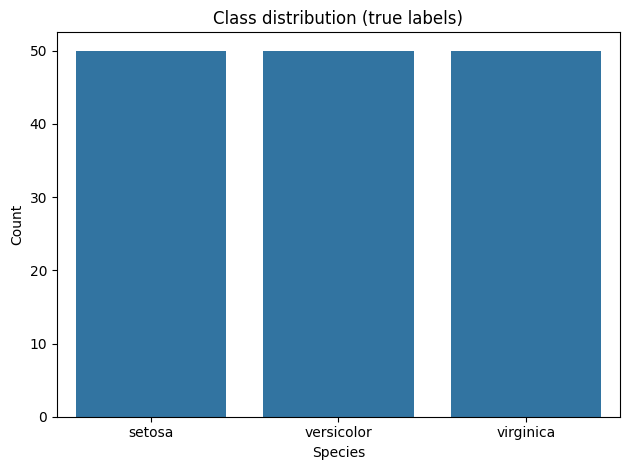

In [4]:
# Visualize class distribution
plt.figure()
sns.countplot(x=df["species"])
plt.title("Class distribution (true labels)")
plt.xlabel("Species")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


== Confusion matrix (rows=true class, cols=cluster) ==
 [[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


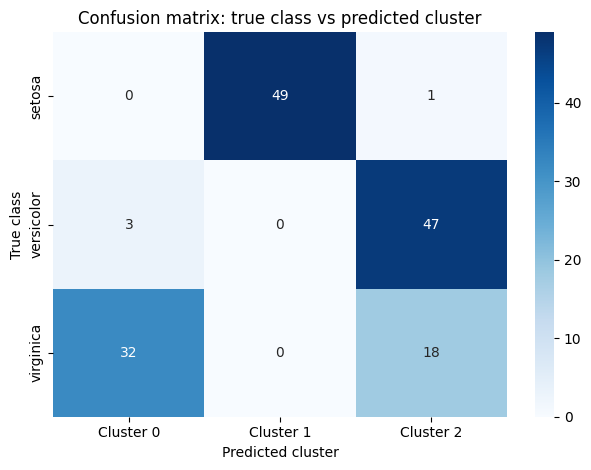

In [5]:
# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Spectral clustering
# n_clusters=3 because iris has 3 species
spectral = SpectralClustering(
    n_clusters=3,
    affinity="nearest_neighbors",  # simple, robust default for spectral
    n_neighbors=10,
    assign_labels="kmeans",
    random_state=42
)
cluster_labels = spectral.fit_predict(X_std)

# Compare clusters vs true classes
cm = confusion_matrix(y, cluster_labels)
print("\n== Confusion matrix (rows=true class, cols=cluster) ==\n", cm)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[f"Cluster {i}" for i in range(cm.shape[1])],
            yticklabels=target_names)
plt.title("Confusion matrix: true class vs predicted cluster")
plt.xlabel("Predicted cluster")
plt.ylabel("True class")
plt.tight_layout()
plt.show()

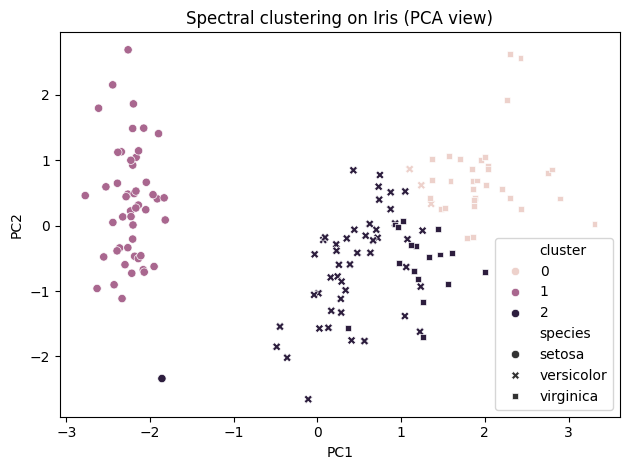

In [6]:
# Visualize clustering results in 2D
# Use PCA for a simple 2D view
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster"] = cluster_labels
pca_df["species"] = df["species"]

# Scatter by predicted cluster
plt.figure()
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", style="species")
plt.title("Spectral clustering on Iris (PCA view)")
plt.tight_layout()
plt.show()

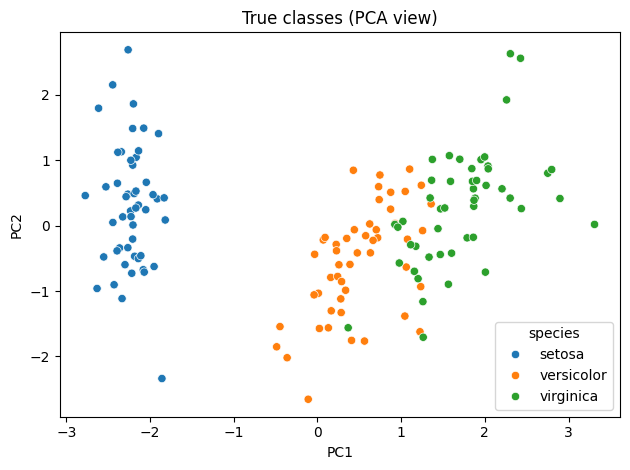

In [7]:
# Scatter by true class (for reference)
plt.figure()
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="species")
plt.title("True classes (PCA view)")
plt.tight_layout()
plt.show()

* The Iris dataset shows clear differences between species in feature values.
* Spectral clustering identified three groups, but with some mixing between versicolor and virginica.
* The confusion matrix shows one cluster mainly matched setosa, while the other two mixed the remaining classes.
* PCA visualization confirmed that setosa is well separated, while the other two classes overlap.
* Overall, spectral clustering roughly captured the dataset structure but not perfect class separation.